<a href="https://colab.research.google.com/github/DavidCastro88/MLappliedtoSCM/blob/main/MLtoSCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score, roc_curve,
                             precision_recall_curve, average_precision_score
)

from sklearn.ensemble import RandomForestClassifier

In [260]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [261]:
data = pd.read_csv('https://raw.githubusercontent.com/DavidCastro88/MLappliedtoSCM/main/Data/DataCoSupplyChainDataset.csv', encoding='latin1')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [263]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

Eliminamos las primeras columnas que a simple vista no nos van aportar nada.

In [264]:
data= data.drop(columns=['Category Id','Customer Email','Customer Fname', 'Customer Id','Customer Street',
                         'Customer Lname','Customer Password','Customer Zipcode','Department Name',
                         'Order Customer Id','Order Id','Order Item Cardprod Id','Order Item Id','Order Zipcode',
                         'Product Card Id','Product Description', 'Product Image', 'Product Name','Product Status',],axis=1)

In [265]:
pd.DataFrame(data.isna().sum())

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Name,0
Customer City,0
Customer Country,0


In [266]:
data[['shipping date (DateOrders)','order date (DateOrders)']]

,shipping date (DateOrders),order date (DateOrders)
0,2/3/2018 22:56,1/31/2018 22:56
1,1/18/2018 12:27,1/13/2018 12:27
2,1/17/2018 12:06,1/13/2018 12:06
3,1/16/2018 11:45,1/13/2018 11:45
4,1/15/2018 11:24,1/13/2018 11:24
...,...,...
180514,1/20/2016 3:40,1/16/2016 3:40
180515,1/19/2016 1:34,1/16/2016 1:34
180516,1/20/2016 21:00,1/15/2016 21:00
180517,1/18/2016 20:18,1/15/2016 20:18


Vamos a crear una nueva variable que se va llamar processing_time, que va ser la diferencia en días, entre la fecha del pedido menos la fecha que se realizo el envio.

In [267]:
data['shipping date'] = pd.to_datetime(data['shipping date (DateOrders)'])
data['order date'] = pd.to_datetime(data['order date (DateOrders)'])

In [268]:
data['processing_time'] = (data['shipping date'] - data['order date']).dt.days

In [269]:
data= data.drop(columns=['shipping date (DateOrders)','order date (DateOrders)','shipping date','order date'],axis=1)

In [270]:
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Category Id,Product Price,Shipping Mode,processing_time
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,...,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,327.750000,Standard Class,3
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,73,327.750000,Standard Class,5
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,...,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,73,327.750000,Standard Class,4
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,...,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,73,327.750000,Standard Class,3
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,...,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,73,327.750000,Standard Class,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,Fishing,Brooklyn,EE. UU.,...,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,45,399.980011,Standard Class,4
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,Fishing,Bakersfield,EE. UU.,...,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,45,399.980011,Second Class,3
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,Fishing,Bristol,EE. UU.,...,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,45,399.980011,Standard Class,5
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,Fishing,Caguas,Puerto Rico,...,399.980011,387.980011,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,45,399.980011,Standard Class,3


In [271]:
data.duplicated().sum()

0

In [272]:
data['Late_delivery_risk'].value_counts()

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

## ***Análisis de variables categoricas***

In [273]:
count_by_type = data.groupby('Type')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_type['%'] = (count_by_type[1] / (count_by_type[0] + count_by_type[1])) * 100
count_by_type

Late_delivery_risk,0,1,%
Type,,,
CASH,8507,11109,56.632341
DEBIT,29646,39649,57.217692
PAYMENT,17721,24004,57.529059
TRANSFER,25668,24215,48.543592


Al parecer el tipo de transacción no influye en si el envio del producto pueda presentar demoras, ya que los porcentajes son proporcionales a los riesgos de entrega tardía casi que para cada tipo, excepto para TRANSFER, con esto y teniendo en cuenta que son pocas categorías se va dejar por el momento.

In [274]:
count_by_category = data.groupby('Category Name')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_category['%'] = (count_by_category[1] / (count_by_category[0] + count_by_category[1])) * 100
count_by_category

Late_delivery_risk,0,1,%
Category Name,,,
Accessories,766,1014,56.966292
As Seen on TV!,29,39,57.352941
Baby,98,109,52.657005
Baseball & Softball,283,349,55.221519
Basketball,30,37,55.223881
Books,176,229,56.543210
Boxing & MMA,185,238,56.264775
CDs,130,141,52.029520
Cameras,248,344,58.108108


Como se puede apreciar la categoria no inlfuye en el riesgo de entrega tardía ya que se observa proporciones muy similares para cada categoría con respecto a las proporciones del total. Por lo tanto se va eliminar esta variable.

In [275]:
count_by_city = data.groupby('Customer City')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_city['%'] = (count_by_city[1] / (count_by_city[0] + count_by_city[1])) * 100
count_by_city

Late_delivery_risk,0,1,%
Customer City,,,
Aguadilla,30,20,40.000000
Alameda,71,47,39.830508
Albany,40,31,43.661972
Albuquerque,214,338,61.231884
Algonquin,47,81,63.281250
...,...,...,...
Yonkers,56,82,59.420290
York,99,142,58.921162
Ypsilanti,69,75,52.083333


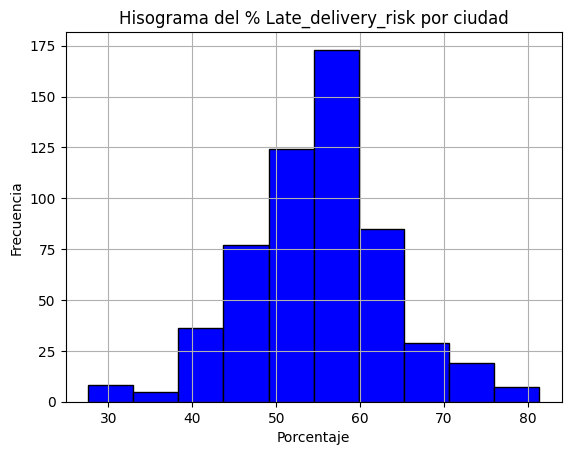

In [276]:
plt.hist(count_by_city['%'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Porcentaje')
plt.ylabel('Frecuencia')
plt.title('Hisograma del % Late_delivery_risk por ciudad')
plt.grid(True)
plt.show()

De entrada vemos que hay 563 ciudades diferentes, por lo que no es una buena idea tener esta variable en el conjutno de datos, además a simple vista en el histograma que la gran mayoría de ciudades de los clientes que presentaron riego de entrega tardía están entre 50 y 60% por lo que no parece tener gran relevancia para determinar la clasificación de si una orden presenta o no riesgo, por lo que va ser eliminada.

In [277]:
count_by_country = data.groupby('Customer Country')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_country['%'] = (count_by_country[1] / (count_by_country[0] + count_by_country[1])) * 100
count_by_country

Late_delivery_risk,0,1,%
Customer Country,,,
EE. UU.,50160,60986,54.870171
Puerto Rico,31382,37991,54.763381


El país del cliente también mantiene las mismas proporciones con relación al conjunto total, por tanto no parece ser tan relevante y sera eliminada.

In [278]:
count_by_segement = data.groupby('Customer Segment')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_segement['%'] = (count_by_segement[1] / (count_by_segement[0] + count_by_segement[1])) * 100
count_by_segement

Late_delivery_risk,0,1,%
Customer Segment,,,
Consumer,42256,51248,54.808350
Corporate,24807,29982,54.722663
Home Office,14479,17747,55.070440


Mismas proporciones, será eliminada.

In [279]:
count_by_state = data.groupby('Customer State')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_state['%'] = (count_by_state[1] / (count_by_state[0] + count_by_state[1])) * 100
count_by_state

Late_delivery_risk,0,1,%
Customer State,,,
91732,1,0,0.000000
95758,1,1,50.000000
AL,18,17,48.571429
AR,69,95,57.926829
AZ,1454,1572,51.949769
CA,13043,16180,55.367348
CO,944,970,50.679206
CT,486,608,55.575868
DC,244,335,57.858377


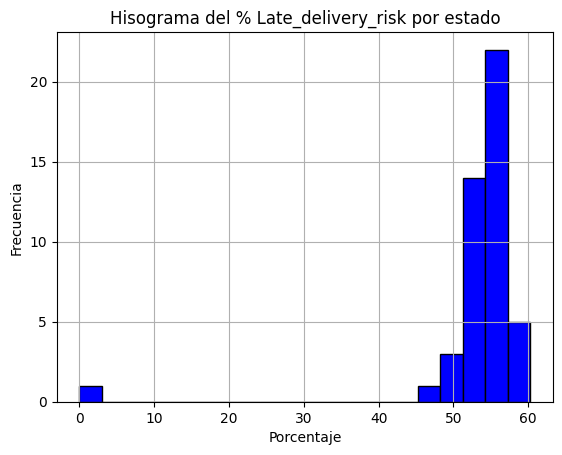

In [280]:
plt.hist(count_by_state['%'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Porcentaje')
plt.ylabel('Frecuencia')
plt.title('Hisograma del % Late_delivery_risk por estado')
plt.grid(True)
plt.show()

Misma frecuencia será eliminada.

In [281]:
count_by_market = data.groupby('Market')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_market['%'] = (count_by_market[1] / (count_by_market[0] + count_by_market[1])) * 100
count_by_market

Late_delivery_risk,0,1,%
Market,,,
Africa,5274,6340,54.589289
Europe,22509,27743,55.207753
LATAM,23550,28044,54.355158
Pacific Asia,18548,22712,55.046049
USCA,11661,14138,54.800574


In [282]:
count_by_country_o = data.groupby('Order Country')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_country_o['%'] = (count_by_country_o[1] / (count_by_country_o[0] + count_by_country_o[1])) * 100
count_by_country_o

Late_delivery_risk,0,1,%
Order Country,,,
Afganistán,70,93,57.055215
Albania,15,22,59.459459
Alemania,4181,5383,56.283982
Angola,123,183,59.803922
Arabia Saudí,364,496,57.674419
...,...,...,...
Vietnam,363,394,52.047556
Yemen,29,42,59.154930
Yibuti,10,21,67.741935


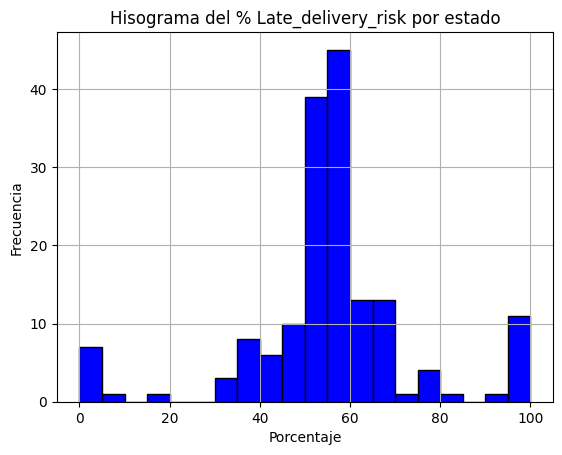

In [283]:
plt.hist(count_by_country_o['%'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Porcentaje')
plt.ylabel('Frecuencia')
plt.title('Hisograma del % Late_delivery_risk por estado')
plt.grid(True)
plt.show()

In [284]:
count_by_order_status = data.groupby('Order Status')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_order_status['%'] = (count_by_order_status[1] / (count_by_order_status[0] + count_by_order_status[1])) * 100
count_by_order_status

Late_delivery_risk,0,1,%
Order Status,,,
CANCELED,3692,0,0.000000
CLOSED,8507,11109,56.632341
COMPLETE,25292,34199,57.486006
ON_HOLD,4354,5450,55.589555
PAYMENT_REVIEW,811,1082,57.157950
PENDING,8515,11712,57.902803
PENDING_PAYMENT,16910,22922,57.546696
PROCESSING,9399,12503,57.086111
SUSPECTED_FRAUD,4062,0,0.000000


In [285]:
count_by_shipping_mode = data.groupby('Shipping Mode')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_shipping_mode['%'] = (count_by_shipping_mode[1] / (count_by_shipping_mode[0] + count_by_shipping_mode[1])) * 100
count_by_shipping_mode

Late_delivery_risk,0,1,%
Shipping Mode,,,
First Class,1301,26513,95.322499
Same Day,5283,4454,45.743042
Second Class,8229,26987,76.632781
Standard Class,66729,41023,38.071683


Como la idea es prevenir si al enviar un producto hay riesgo de entrega tardía, se van a eliminar las variables que contengan información que no se pueda conocer antes del envió, como por ejemplo el estado de entrega (delivery_status).


In [286]:
data=data.drop(columns=['Delivery Status', 'Category Name','Customer City','Customer Country','Customer Segment','Customer State','Market','Order City','Order Country','Order Region','Order State'])

## ***Análisis de variables numércias***

In [287]:
count_by_departamen = data.groupby('Department Id')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_departamen['%'] = (count_by_departamen[1] / (count_by_departamen[0] + count_by_departamen[1])) * 100
count_by_departamen

Late_delivery_risk,0,1,%
Department Id,,,
2,1102,1377,55.546591
3,6576,7949,54.726334
4,22173,26825,54.747133
5,15022,18198,54.780253
6,4311,5375,55.492463
7,30238,36623,54.774831
8,176,229,56.543210
9,923,1103,54.442251
10,659,806,55.017065


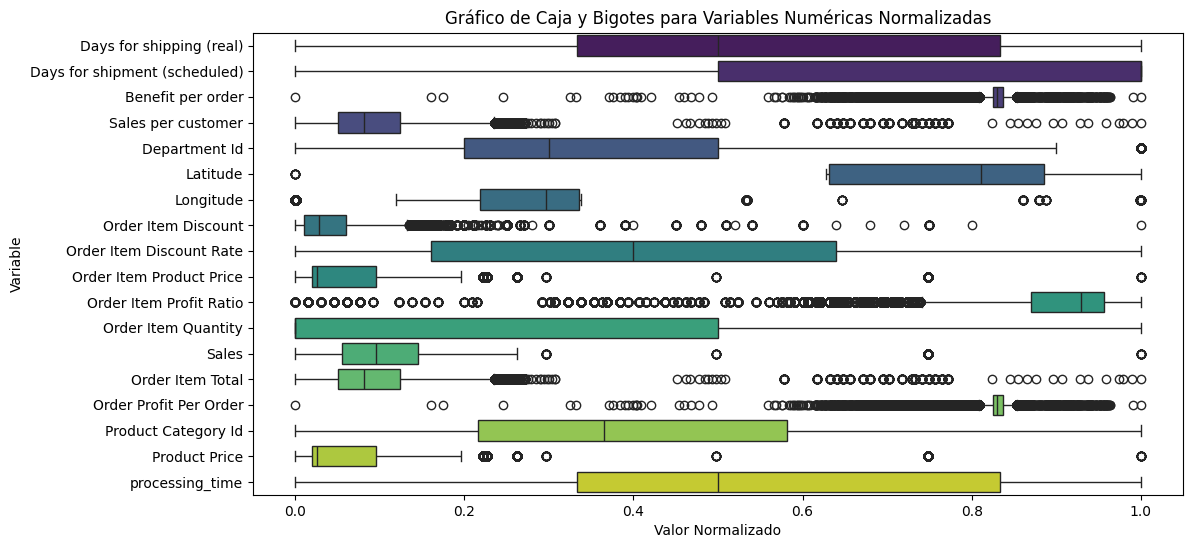

In [288]:
# Seleccionar columnas numéricas
numeric_columns = data.select_dtypes(include='number').drop('Late_delivery_risk', axis=1)
scaler = MinMaxScaler()
normalized_numeric_columns = scaler.fit_transform(numeric_columns)
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)
plt.figure(figsize=(12, 6))
colors = sns.color_palette('viridis', len(normalized_df.columns))
sns.boxplot(data=normalized_df, orient='h', palette=colors)
plt.title('Gráfico de Caja y Bigotes para Variables Numéricas Normalizadas')
plt.xlabel('Valor Normalizado')
plt.ylabel('Variable')
plt.show()

In [289]:
def reemplazar_valores_atipicos_con_mediana(df, columnas):
    for columna in columnas:
        limite_superior = df[columna].quantile(0.98)
        limite_inferior = df[columna].quantile(0.02)
        mediana = df[columna].median()
        df[columna] = df[columna].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)
    return df

In [290]:
columnas = [
 'Benefit per order',
 'Sales per customer',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Category Id',
 'Product Price']
data = reemplazar_valores_atipicos_con_mediana(data, columnas)

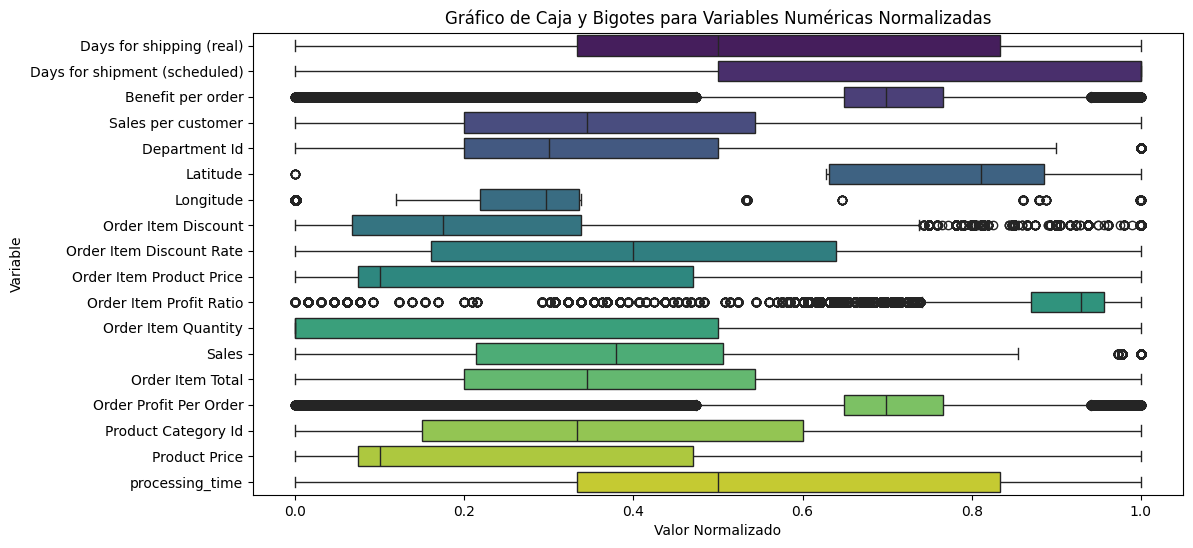

In [291]:
# Seleccionar columnas numéricas
numeric_columns = data.select_dtypes(include='number').drop('Late_delivery_risk', axis=1)
scaler = MinMaxScaler()
normalized_numeric_columns = scaler.fit_transform(numeric_columns)
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)
plt.figure(figsize=(12, 6))
colors = sns.color_palette('viridis', len(normalized_df.columns))
sns.boxplot(data=normalized_df, orient='h', palette=colors)
plt.title('Gráfico de Caja y Bigotes para Variables Numéricas Normalizadas')
plt.xlabel('Valor Normalizado')
plt.ylabel('Variable')
plt.show()

In [292]:
data.select_dtypes(include=['int64', 'float64']).columns.tolist()

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Late_delivery_risk',
 'Department Id',
 'Latitude',
 'Longitude',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Category Id',
 'Product Price',
 'processing_time']

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Late_delivery_risk             180519 non-null  int64  
 6   Department Id                  180519 non-null  int64  
 7   Latitude                       180519 non-null  float64
 8   Longitude                      180519 non-null  float64
 9   Order Item Discount            180519 non-null  float64
 10  Order Item Discount Rate       180519 non-null  float64
 11  Order Item Product Price       180519 non-null  float64
 12  Order Item Profit Ratio       

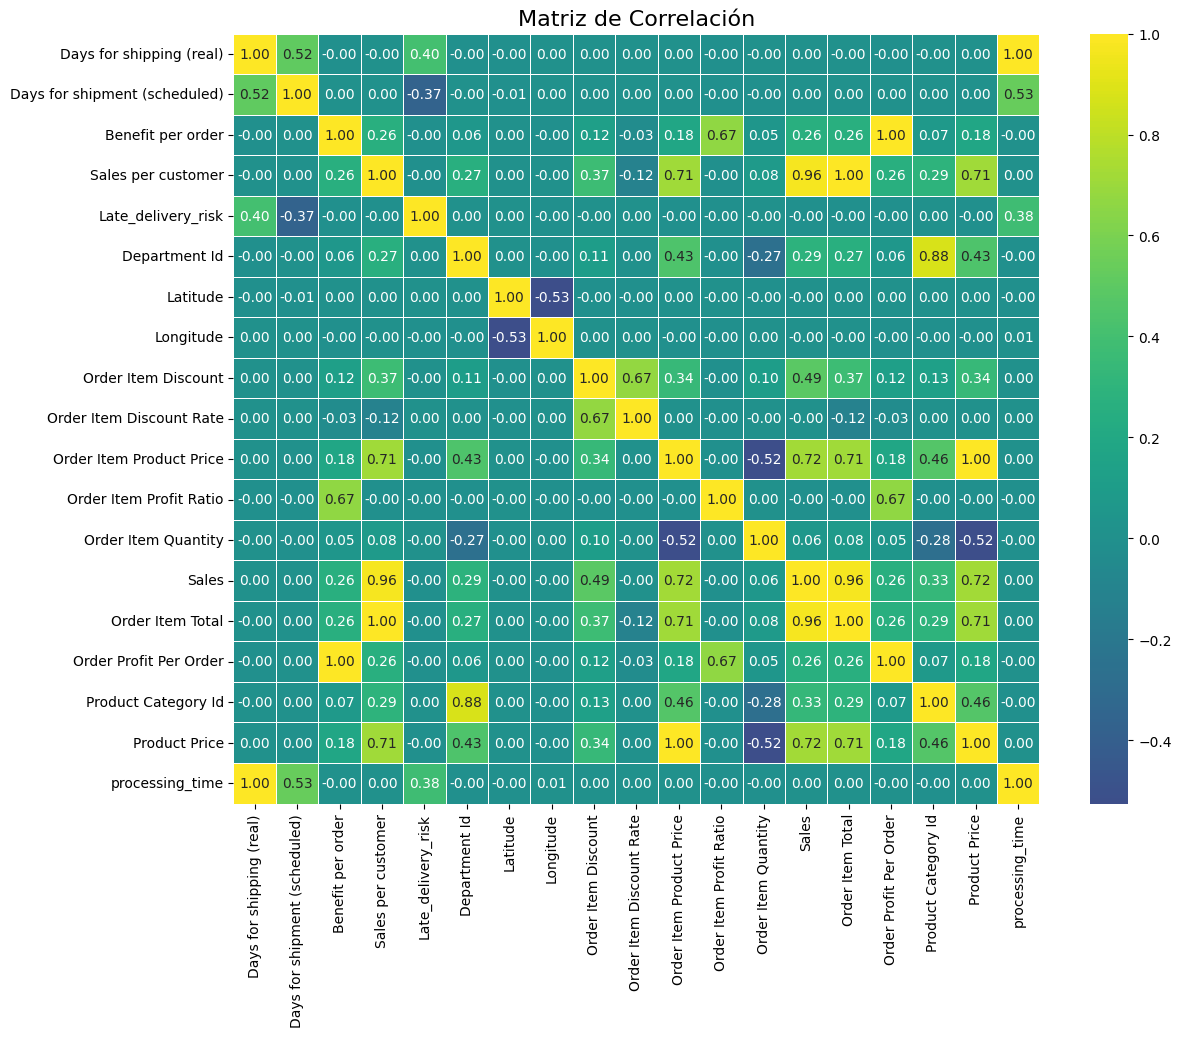

In [294]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

In [295]:
data= data.drop(columns=['Order Profit Per Order','Sales per customer','Product Category Id','Order Item Product Price','processing_time','Order Item Total','Order Item Discount Rate','Product Price','Department Id'])

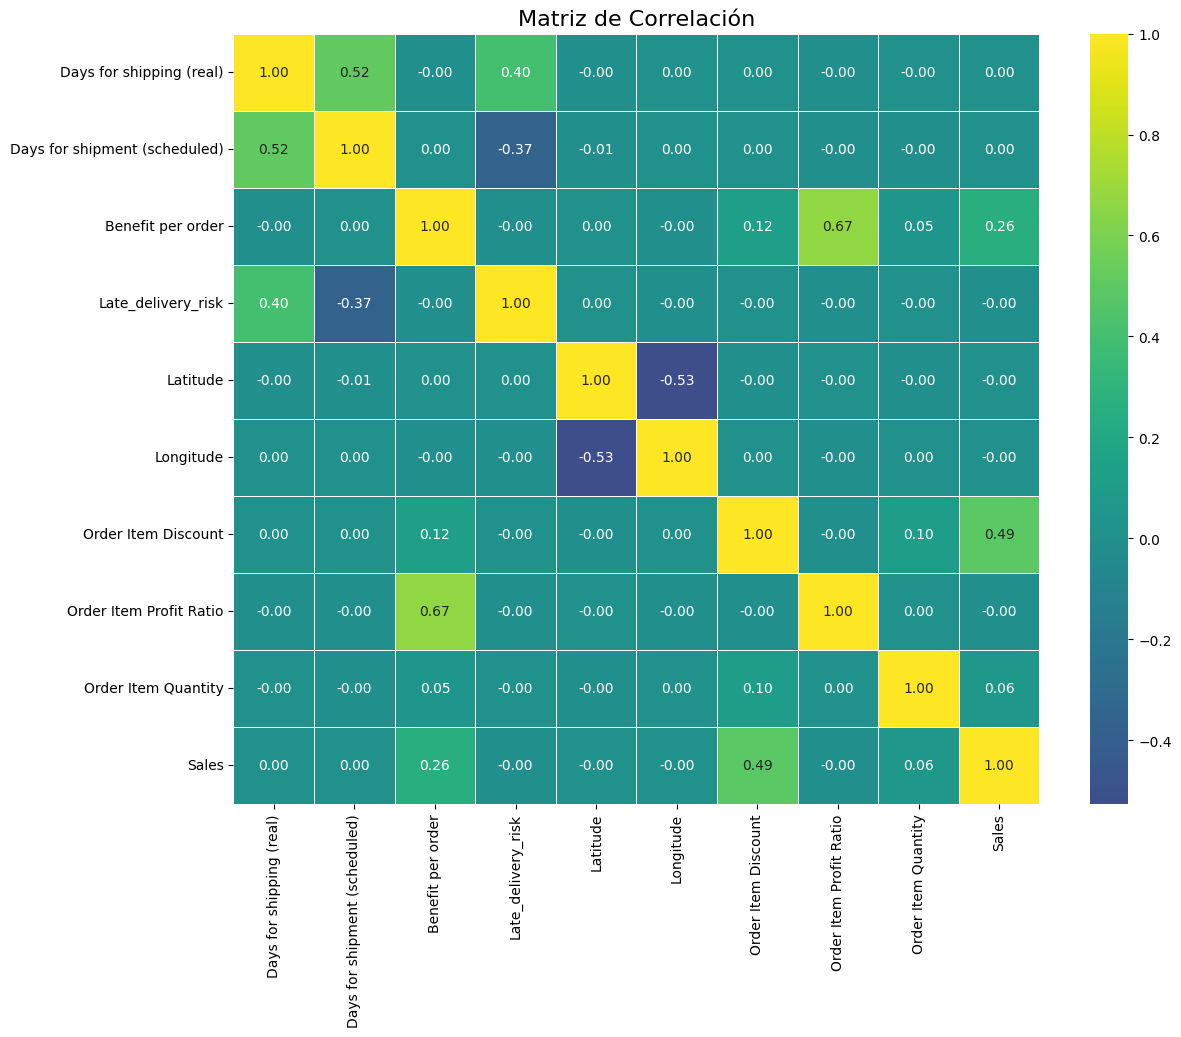

In [296]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

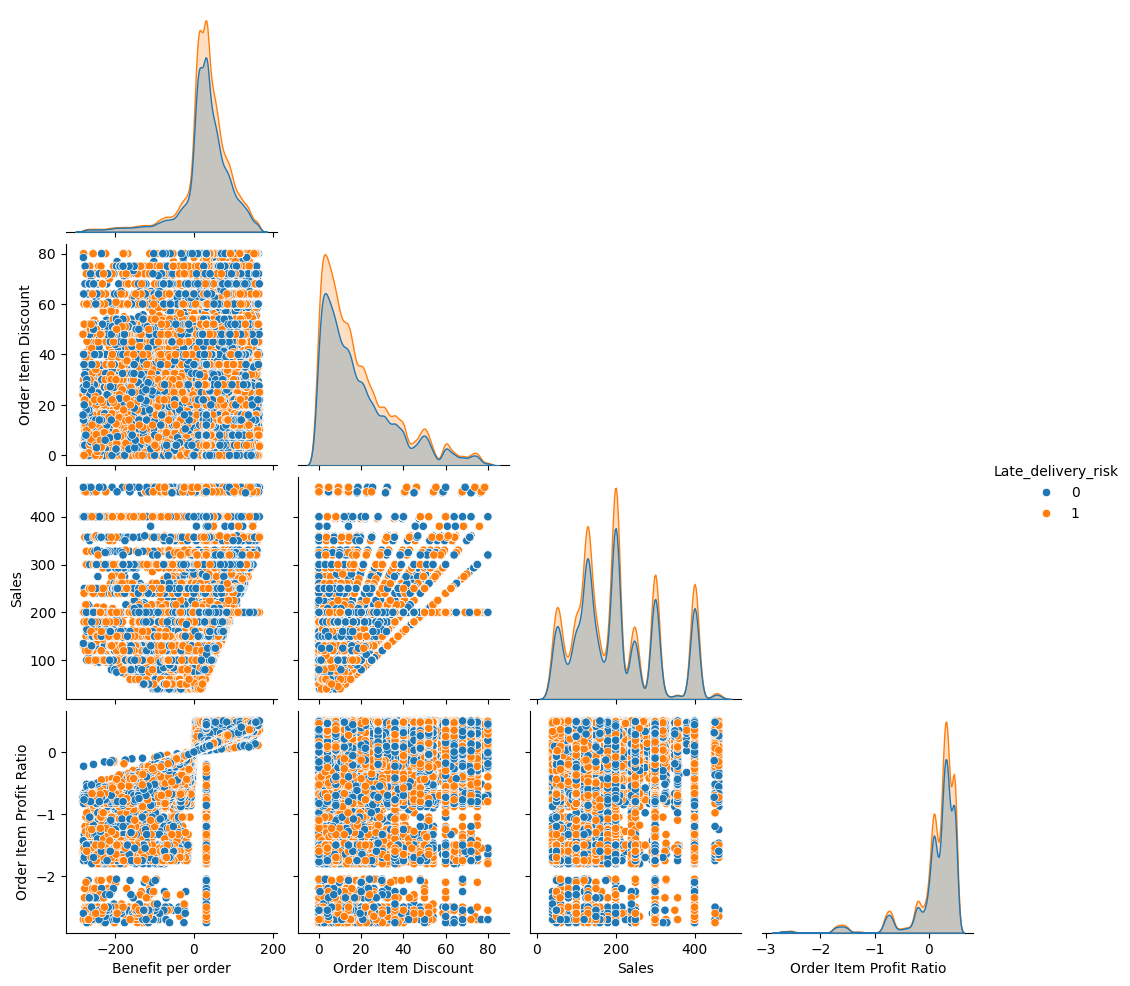

In [297]:
sns.pairplot(data[['Benefit per order', 'Late_delivery_risk','Order Item Discount','Sales','Order Item Profit Ratio']], hue='Late_delivery_risk', corner=True)
plt.show()

In [298]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Latitude,Longitude,Order Item Discount,Order Item Profit Ratio,Order Item Quantity,Sales,Order Status,Shipping Mode
0,DEBIT,3,4,91.250000,0,18.251453,-66.037056,13.110000,0.29,1,327.75,COMPLETE,Standard Class
1,TRANSFER,5,4,-249.089996,1,18.279451,-66.037064,16.389999,-0.80,1,327.75,PENDING,Standard Class
2,CASH,4,4,-247.779999,0,37.292233,-121.881279,18.030001,-0.80,1,327.75,CLOSED,Standard Class
3,DEBIT,3,4,22.860001,0,34.125946,-118.291016,22.940001,0.08,1,327.75,COMPLETE,Standard Class
4,PAYMENT,2,4,134.210007,0,18.253769,-66.037048,29.500000,0.45,1,327.75,PENDING_PAYMENT,Standard Class


In [299]:
count_by_days = data.groupby('Days for shipping (real)')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_days['%'] = (count_by_days[1] / (count_by_days[0] + count_by_days[1])) * 100
count_by_days

Late_delivery_risk,0,1,%
Days for shipping (real),,,
0,5080,0,0.000000
1,203,4454,95.640971
2,30105,26513,46.827864
3,22006,6759,23.497306
4,21754,6759,23.704977
5,1160,27003,95.881121
6,1234,27489,95.703791


In [301]:
count_by_days = data.groupby('Days for shipment (scheduled)')['Late_delivery_risk'].value_counts().unstack(fill_value=0)
count_by_days['%'] = (count_by_days[1] / (count_by_days[0] + count_by_days[1])) * 100
count_by_days

Late_delivery_risk,0,1,%
Days for shipment (scheduled),,,
0,5283,4454,45.743042
1,1301,26513,95.322499
2,8229,26987,76.632781
4,66729,41023,38.071683


In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Late_delivery_risk             180519 non-null  int64  
 5   Latitude                       180519 non-null  float64
 6   Longitude                      180519 non-null  float64
 7   Order Item Discount            180519 non-null  float64
 8   Order Item Profit Ratio        180519 non-null  float64
 9   Order Item Quantity            180519 non-null  int64  
 10  Sales                          180519 non-null  float64
 11  Order Status                   180519 non-null  object 
 12  Shipping Mode                 

In [405]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()

Data 1

In [406]:
data1= data1[['Type','Days for shipment (scheduled)','Benefit per order','Order Status','Shipping Mode','Late_delivery_risk']]

In [407]:
data1 = pd.get_dummies(data1, columns=['Type','Order Status','Shipping Mode'], prefix=['Type','Order Status','Shipping Mode'])
data1

,Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Order Status_CANCELED,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,4,91.250000,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,4,-249.089996,1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
2,4,-247.779999,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,4,22.860001,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,4,134.210007,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,40.000000,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
180515,2,31.520000,1,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
180516,4,141.110001,1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
180517,4,31.520000,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [408]:
data1.columns

Index(['Days for shipment (scheduled)', 'Benefit per order',
       'Late_delivery_risk', 'Type_CASH', 'Type_DEBIT', 'Type_PAYMENT',
       'Type_TRANSFER', 'Order Status_CANCELED', 'Order Status_CLOSED',
       'Order Status_COMPLETE', 'Order Status_ON_HOLD',
       'Order Status_PAYMENT_REVIEW', 'Order Status_PENDING',
       'Order Status_PENDING_PAYMENT', 'Order Status_PROCESSING',
       'Order Status_SUSPECTED_FRAUD', 'Shipping Mode_First Class',
       'Shipping Mode_Same Day', 'Shipping Mode_Second Class',
       'Shipping Mode_Standard Class'],
      dtype='object')

Data 2

In [409]:
data2 = data2.drop('Days for shipping (real)',axis=1)
data2 = pd.get_dummies(data2, columns=['Type','Order Status','Shipping Mode'], prefix=['Type','Order Status','Shipping Mode'])

In [410]:
data2.columns

Index(['Days for shipment (scheduled)', 'Benefit per order',
       'Late_delivery_risk', 'Latitude', 'Longitude', 'Order Item Discount',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Type_CASH',
       'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Order Status_CANCELED',
       'Order Status_CLOSED', 'Order Status_COMPLETE', 'Order Status_ON_HOLD',
       'Order Status_PAYMENT_REVIEW', 'Order Status_PENDING',
       'Order Status_PENDING_PAYMENT', 'Order Status_PROCESSING',
       'Order Status_SUSPECTED_FRAUD', 'Shipping Mode_First Class',
       'Shipping Mode_Same Day', 'Shipping Mode_Second Class',
       'Shipping Mode_Standard Class'],
      dtype='object')

Data 3

In [411]:
data3.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Latitude,Longitude,Order Item Discount,Order Item Profit Ratio,Order Item Quantity,Sales,Order Status,Shipping Mode
0,DEBIT,3,4,91.250000,0,18.251453,-66.037056,13.110000,0.29,1,327.75,COMPLETE,Standard Class
1,TRANSFER,5,4,-249.089996,1,18.279451,-66.037064,16.389999,-0.80,1,327.75,PENDING,Standard Class
2,CASH,4,4,-247.779999,0,37.292233,-121.881279,18.030001,-0.80,1,327.75,CLOSED,Standard Class
3,DEBIT,3,4,22.860001,0,34.125946,-118.291016,22.940001,0.08,1,327.75,COMPLETE,Standard Class
4,PAYMENT,2,4,134.210007,0,18.253769,-66.037048,29.500000,0.45,1,327.75,PENDING_PAYMENT,Standard Class


In [412]:
data3['Sales'].value_counts()

Sales
129.990005    22372
399.980011    17325
199.990005    15622
299.980011    13729
199.919998    10937
              ...  
399.799988       12
379.959992       10
396.000000        9
198.000000        9
99.000000         9
Name: count, Length: 161, dtype: int64

In [413]:
def generar_intervalos(dataset,feature,num_cuartiles):
  """
  Función para obtener los intervalos en los que se debe dividir una variable en especifico

  Parámetros:
    - dataset: DataFrame con los datos
    - feature: la variable
    - num_cuartiles: la cantidad de cuartiles que queremos usar para la división

    Retorna una lista con los valores inferiores de cada intervalo
  """
  bins=[dataset[feature].min()] #Añadimos el valor minimo, para que los contenedores empiecen desde ahí
  cuartiles = [dataset[feature].quantile(q) for q in [i / num_cuartiles for i in range(1, num_cuartiles)]]
  for cuartil in cuartiles: #Añadimos los cuartiles
    bins.append(cuartil)
  bins.append(float('inf'))
  return bins

def convertir_a_dummy(df, columnas, intervalos):
    """
    Convierte las columnas numéricas especificadas en variables dummy con intervalos dados.

    Parámetros:
    - df: DataFrame de los datos.
    - columnas: Lista de nombres de columnas a convertir en dummy.
    - intervalos: Lista de listas de intervalos correspondientes a cada columna.

    Retorna un nuevo DataFrame con las variables dummy agregadas y sin las columnas de intervalo.
    """
    df_nuevo = df.copy()

    for col, bins in zip(columnas, intervalos):
        intervalos_cortados = pd.cut(df_nuevo[col], bins=bins, right=False)
        variables_dummy = pd.get_dummies(intervalos_cortados, prefix=f'{col}')
        df_nuevo.drop(columns=[col], inplace=True)
        df_nuevo = pd.concat([df_nuevo, variables_dummy], axis=1)
    return df_nuevo

In [414]:
intervalos_benefit = generar_intervalos(data3,'Benefit per order',20)
intervalos_latitud = generar_intervalos(data3,'Latitude',20)
intervalos_longitud = generar_intervalos(data3,'Longitude',20)
intervalos_order = generar_intervalos(data3,'Order Item Discount',15)
intervalos_order_profit = generar_intervalos(data3,'Order Item Profit Ratio',10)
intervalos_order_sales = generar_intervalos(data3,'Sales',10)

data3=convertir_a_dummy(data3,['Benefit per order','Latitude','Longitude','Order Item Discount','Order Item Profit Ratio','Sales'],
 [intervalos_benefit,intervalos_latitud,intervalos_longitud,intervalos_order,intervalos_order_profit,intervalos_order_sales])
data3

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Order Item Quantity,Order Status,Shipping Mode,"Benefit per order_[-281.59, -88.885)","Benefit per order_[-88.885, -32.6)","Benefit per order_[-32.6, -6.35)",...,"Sales_[39.75, 59.99)","Sales_[59.99, 109.95)","Sales_[109.95, 129.99)","Sales_[129.99, 150.0)","Sales_[150.0, 199.92)","Sales_[199.92, 199.99)","Sales_[199.99, 239.96)","Sales_[239.96, 299.98)","Sales_[299.98, 399.98)","Sales_[399.98, inf)"
0,DEBIT,3,4,0,1,COMPLETE,Standard Class,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,TRANSFER,5,4,1,1,PENDING,Standard Class,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,CASH,4,4,0,1,CLOSED,Standard Class,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,DEBIT,3,4,0,1,COMPLETE,Standard Class,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,PAYMENT,2,4,0,1,PENDING_PAYMENT,Standard Class,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,0,1,CLOSED,Standard Class,False,False,False,...,False,False,False,False,False,False,False,False,False,True
180515,DEBIT,3,2,1,1,COMPLETE,Second Class,False,False,False,...,False,False,False,False,False,False,False,False,False,True
180516,TRANSFER,5,4,1,1,PENDING,Standard Class,False,False,False,...,False,False,False,False,False,False,False,False,False,True
180517,PAYMENT,3,4,0,1,PENDING_PAYMENT,Standard Class,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [415]:
data3 =data3.drop('Days for shipping (real)',axis=1)
data3 = pd.get_dummies(data3, columns=['Type','Order Status','Shipping Mode','Order Item Quantity','Days for shipment (scheduled)'],
                       prefix=['Type','Order Status','Shipping Mode','Order Item Quantity','Days for shipment (scheduled)'])

In [ ]:
data3

## ***Ajuste de modelos***

### ***Random Forest***

In [455]:
#Dividimos los datos que vamos a usar para ajustar el modelo de RandomForest
datos_tr_RF, datos_vl_RF = train_test_split(data2, train_size=0.8, random_state=20)
# Extraer la columna Y de los conjuntos de entrenamiento y validación
Y_tr_RF = datos_tr_RF['Late_delivery_risk']
Y_vl_RF = datos_vl_RF['Late_delivery_risk']
# Extraer todas las columnas excepto Y de los conjuntos de entrenamiento y validación
X_tr_RF = datos_tr_RF.drop(columns=['Late_delivery_risk'])
X_vl_RF = datos_vl_RF.drop(columns=['Late_delivery_risk'])

In [456]:
#Creamos la instancia
modelo_1 = RandomForestClassifier()
#Ajustamos
modelo_1.fit(X_tr_RF,Y_tr_RF)
#Predecimos con los datos de validación
Y_pred_mod1 = modelo_1.predict(X_vl_RF)
#Metricas
accuracy_mod1 = metrics.accuracy_score(Y_vl_RF, Y_pred_mod1)
precision_mod1 = metrics.precision_score(Y_vl_RF, Y_pred_mod1)
recall_mod1 = metrics.recall_score(Y_vl_RF,Y_pred_mod1)
f1_mod1 = metrics.f1_score(Y_vl_RF, Y_pred_mod1)
print(f'accuracy: {accuracy_mod1},  precision: {precision_mod1}, recall: {recall_mod1} ')

accuracy: 0.70488034566807,  precision: 0.7639610200151719, recall: 0.6645010658816364 


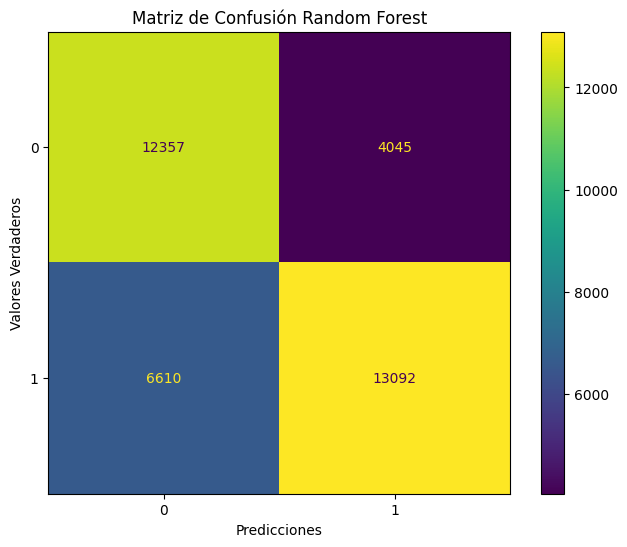

In [457]:
#Matrix de confusión
cm1 = metrics.confusion_matrix(Y_vl_RF,Y_pred_mod1)
plt.rcParams["axes.grid"] = False
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = modelo_1.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp2.plot(ax=ax, cmap='viridis', values_format='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión Random Forest')
plt.show()

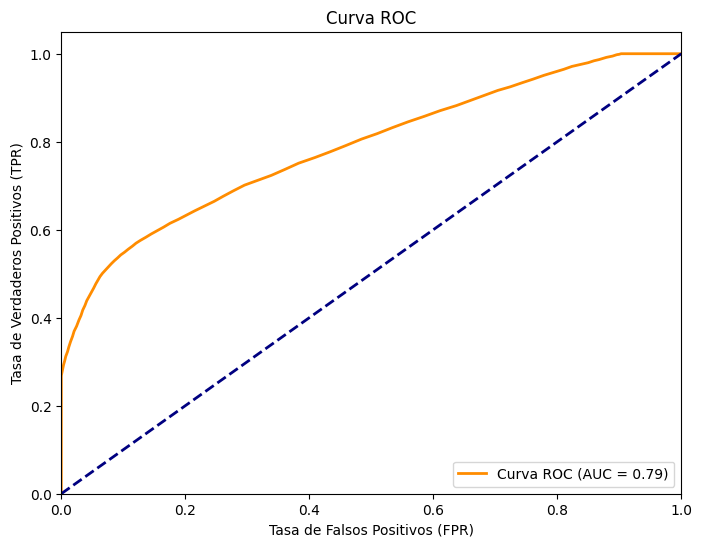

In [458]:
#Probabilidades de predicción en el conjunto de validación
prob_predict_mod1 = modelo_1.predict_proba(X_vl_RF)[:, 1]
fpr1, tpr1, umbrales1 = metrics.roc_curve(Y_vl_RF, prob_predict_mod1)
# Calcular el área bajo la curva ROC (AUC)
auc_mod1 = metrics.roc_auc_score(Y_vl_RF, prob_predict_mod1)
# Crear la gráfica de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_mod1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [460]:
# Obtener la importancia de las variables
importances = modelo_1.feature_importances_

# Ordenar las importancias de las variables de mayor a menor
indices = np.argsort(importances)[::-1]

# Mostrar la importancia de las variables
for i in range(X_tr_RF.shape[1]):
    print(f"Variable {i+1}: {X_tr_RF.columns[indices[i]]} - Importancia: {importances[indices[i]]}")

Variable 1: Latitude - Importancia: 0.15279012805801165
Variable 2: Longitude - Importancia: 0.13965740154171635
Variable 3: Benefit per order - Importancia: 0.13161609849141725
Variable 4: Order Item Discount - Importancia: 0.10651238079121977
Variable 5: Order Item Profit Ratio - Importancia: 0.10404024889479854
Variable 6: Days for shipment (scheduled) - Importancia: 0.07134083901751065
Variable 7: Sales - Importancia: 0.06273147080854813
Variable 8: Shipping Mode_Standard Class - Importancia: 0.06102238794809108
Variable 9: Shipping Mode_First Class - Importancia: 0.04919363553283979
Variable 10: Order Status_SUSPECTED_FRAUD - Importancia: 0.025360809583256955
Variable 11: Order Status_CANCELED - Importancia: 0.023408198562490667
Variable 12: Shipping Mode_Second Class - Importancia: 0.02052148530364267
Variable 13: Order Item Quantity - Importancia: 0.019726411082092766
Variable 14: Shipping Mode_Same Day - Importancia: 0.009766234617937262
Variable 15: Type_TRANSFER - Importancia

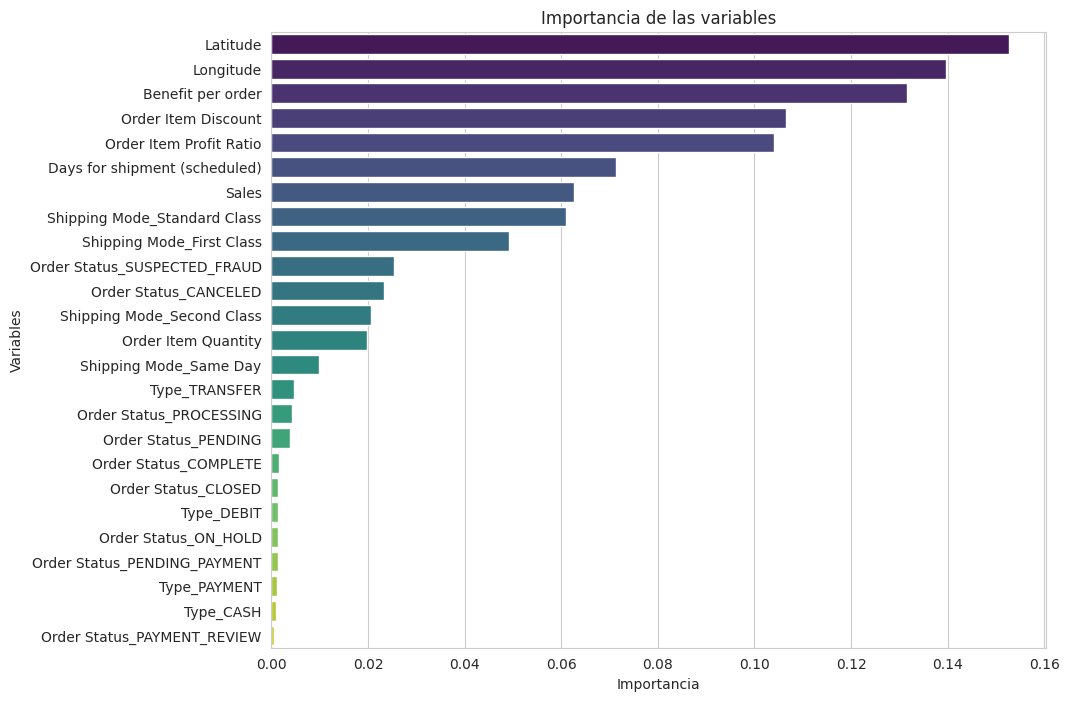

In [462]:
# Establecer el estilo de la gráfica
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.barplot(x=importances[indices], y=X_tr_RF.columns[indices], palette='viridis')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables')
plt.show()

### ***Regresión Logistica***

In [427]:
#Dividimos los datos que vamos a usar para ajustar el modelo de RandomForest
datos_tr_LR, datos_vl_LR = train_test_split(data3, train_size=0.8, random_state=20)
# Extraer la columna Y de los conjuntos de entrenamiento y validación
Y_tr_LR = datos_tr_LR['Late_delivery_risk']
Y_vl_LR = datos_vl_LR['Late_delivery_risk']
# Extraer todas las columnas excepto Y de los conjuntos de entrenamiento y validación
X_tr_LR = datos_tr_LR.drop(columns=['Late_delivery_risk'])
X_vl_LR = datos_vl_LR.drop(columns=['Late_delivery_risk'])

In [428]:
# Inicialización del modelo
modelo_2 = LogisticRegression(max_iter=2000, class_weight = 'balanced')
# Entrenamiento
modelo_2.fit(X_tr_LR,Y_tr_LR)
# Realizar predicciones en el conjunto de validación
Y_pred_mod2 = modelo_2.predict(X_vl_LR)
accuracy_mod2 = metrics.accuracy_score(Y_vl_LR, Y_pred_mod2)
precision_mod2 = metrics.precision_score(Y_vl_LR, Y_pred_mod2)
recall_mod2 = metrics.recall_score(Y_vl_LR, Y_pred_mod2)
f1_mod2 = metrics.f1_score(Y_vl_LR, Y_pred_mod2)
print(f'accuracy: {accuracy_mod2},  precision: {precision_mod2}, recall: {recall_mod2} ')

accuracy: 0.7119432749833814,  precision: 0.8833031152134498, recall: 0.5440056847020607 


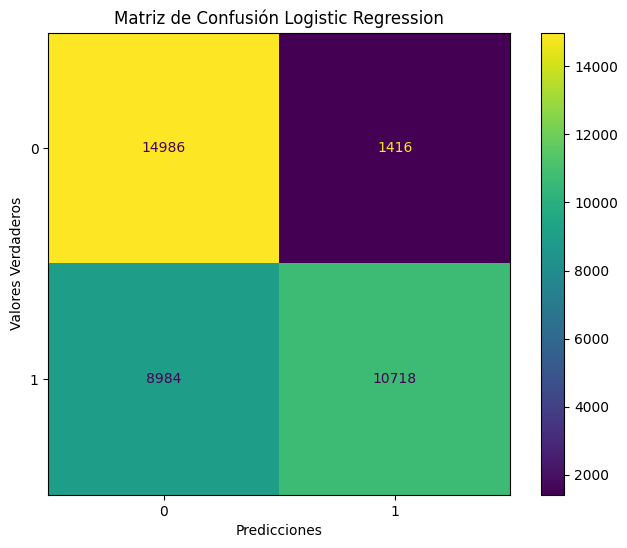

In [450]:
cm = metrics.confusion_matrix(Y_vl_LR, Y_pred_mod2)
plt.rcParams["axes.grid"] = False
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_2.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='viridis', values_format='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión Logistic Regression')
plt.show()

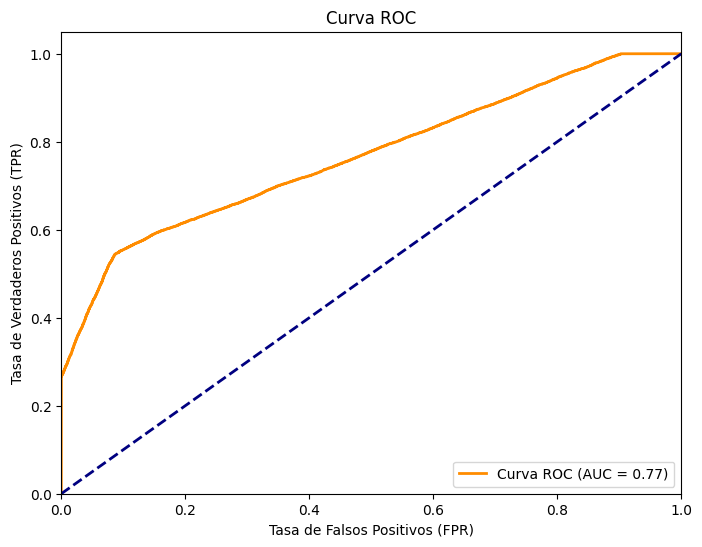

In [436]:
#Probabilidades de predicción en el conjunto de validación
prob_predict_mod2 = modelo_2.predict_proba(X_vl_LR)[:, 1]
fpr2, tpr2, umbrales2 = metrics.roc_curve(Y_vl_LR, prob_predict_mod2)
# Calcular el área bajo la curva ROC (AUC)
auc_mod2 = metrics.roc_auc_score(Y_vl_LR, prob_predict_mod2)
# Crear la gráfica de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_mod2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### ***KNN***

In [431]:
#Dividimos los datos que vamos a usar para ajustar el modelo de RandomForest
datos_tr_Kn, datos_vl_Kn = train_test_split(data2, train_size=0.8, random_state=20)
# Extraer la columna Y de los conjuntos de entrenamiento y validación
Y_tr_Kn = datos_tr_Kn['Late_delivery_risk']
Y_vl_Kn = datos_vl_Kn['Late_delivery_risk']
# Extraer todas las columnas excepto Y de los conjuntos de entrenamiento y validación
X_tr_Kn = datos_tr_Kn.drop(columns=['Late_delivery_risk'])
X_vl_Kn = datos_vl_Kn.drop(columns=['Late_delivery_risk'])

In [432]:
k=6
modelo_3 = KNeighborsClassifier(n_neighbors=k)
scaler = StandardScaler()
X_tr_estandar = scaler.fit_transform(X_tr_Kn)
X_vl_estandar = scaler.transform(X_vl_Kn)
# Entrenar el modelo k-NN con los datos de entrenamiento
modelo_3.fit(X_tr_estandar, Y_tr_Kn)

KNeighborsClassifier(n_neighbors=6)

In [433]:
# Realizar predicciones en el conjunto de validación
Y_pred_mod3 = modelo_3.predict(X_vl_estandar)
accuracy_mod3 = metrics.accuracy_score(Y_vl_Kn, Y_pred_mod3)
precision_mod3 = metrics.precision_score(Y_vl_Kn, Y_pred_mod3)
recall_mod3 = metrics.recall_score(Y_vl_Kn, Y_pred_mod3)
f1_mod3 = metrics.f1_score(Y_vl_Kn, Y_pred_mod3)
print(f'accuracy: {accuracy_mod3},  precision: {precision_mod3}, recall: {recall_mod3} ')

accuracy: 0.6789552404165743,  precision: 0.757018822485582, recall: 0.6062836260278144 


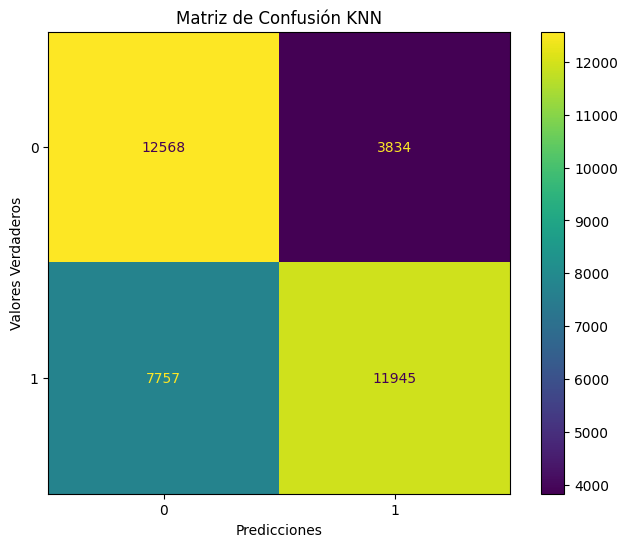

In [452]:
cm = metrics.confusion_matrix(Y_vl_Kn, Y_pred_mod3)
plt.rcParams["axes.grid"] = False
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_3.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='viridis', values_format='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión KNN')
plt.show()

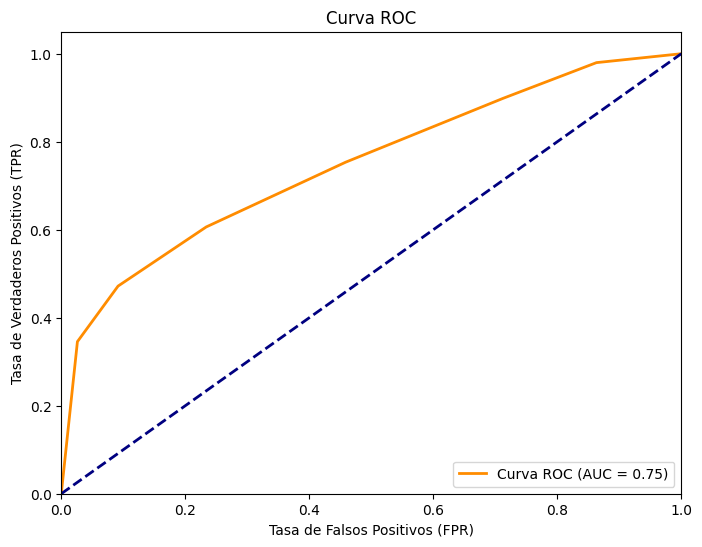

In [437]:
#Probabilidades de predicción en el conjunto de validación
prob_predict_mod3 = modelo_3.predict_proba(X_vl_estandar)[:, 1]
fpr3, tpr3, umbrales3 = metrics.roc_curve(Y_vl_Kn, prob_predict_mod3)
auc_mod3 = metrics.roc_auc_score(Y_vl_Kn, prob_predict_mod3)
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_mod3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [438]:
#Resumen de las métricas obtenidas
modelo1_metrics = {'Accuracy': accuracy_mod1, 'Precisión': precision_mod1, 'Recall': recall_mod1, 'AUC': auc_mod1}
modelo2_metrics = {'Accuracy': accuracy_mod2, 'Precisión': precision_mod2, 'Recall': recall_mod2, 'AUC': auc_mod2}
modelo3_metrics = {'Accuracy': accuracy_mod3, 'Precisión': precision_mod3, 'Recall': recall_mod3, 'AUC': auc_mod3}
df_metrics = pd.DataFrame([modelo1_metrics, modelo2_metrics, modelo3_metrics],
                          index=['Modelo 1', 'Modelo 2', 'Modelo 3'])
df_metrics

,Accuracy,Precisión,Recall,AUC
Modelo 1,0.701723,0.759816,0.662978,0.784985
Modelo 2,0.711943,0.883303,0.544006,0.766169
Modelo 3,0.678955,0.757019,0.606284,0.747467


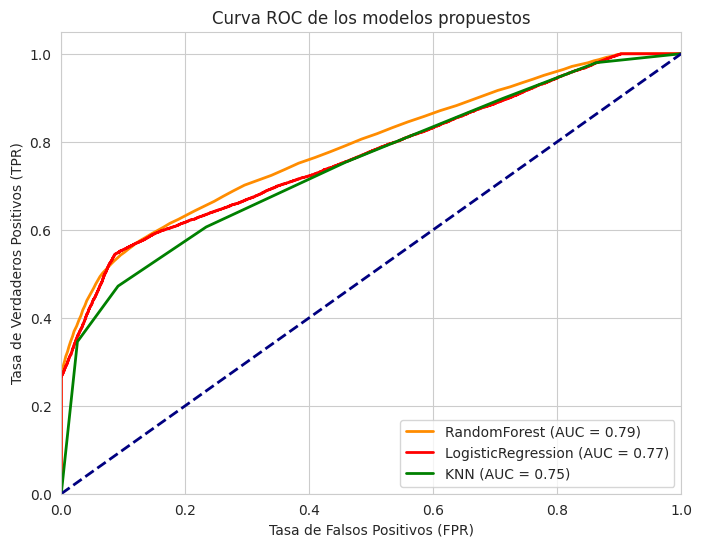

In [463]:
# Crear la gráfica de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'RandomForest (AUC = {auc_mod1:.2f})')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'LogisticRegression (AUC = {auc_mod2:.2f})')
plt.plot(fpr3, tpr3, color='green', lw=2, label=f'KNN (AUC = {auc_mod3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC de los modelos propuestos')
plt.legend(loc='lower right')
plt.show()